# The Journey from Mathematics to Machine Learning

## Series 1: Linear algebra

### Episode 4 Part 2: Vector norms and Orthogonality

- NLP (Jupyter Notebook)
    1. [The Factorization A = QR](#1.-The-Factorization-A-=-QR)
    2. [We must not forget why this is useful](#2.-We-must-not-forget-why-this-is-useful)


    
    

## 1. The Factorization A = QR

In [4]:
import numpy as np

### Data

In [5]:
A = np.array([[1, 1], 
              [1, 0], 
              [1, 2]])

In [6]:
A.shape

(3, 2)

#### Preparing the input dataset

In [7]:
def matrix_factorization_qr(A):
    """
    Applies the Gram-Schmidt method to A
    "A" matrix should have independet columns
    and returns Q orthonormal bases matrix
    and R upper triangular matrix, so A = QR
    """
    
    # A = QR -> m x n = m x n * n x n
    Q = np.zeros(A.shape)
    R = np.zeros((A.shape[1], A.shape[1]))
    
    for j in range(A.shape[1]):
        v = A[:, j] # v begins as column j of the original A
        for i in range(j):
            R[i, j] = np.dot(Q[:, i], v) # compute R_ij = q_i_T * v
            v = v - np.dot(R[i, j], Q[:, i]) # subtract the projection q_i_T * v * q_i
        Q[:, j] = v / np.sqrt(np.dot(v, v)) # divide v by its length to get the next q_j
        R[j, j] = np.dot(Q[:, j], A[:, j]) # calculate the diagnol entries of R
    
    return Q, R

In [8]:
Q, R = matrix_factorization_qr(A)

In [9]:
Q.round(2)

array([[ 0.58, -0.  ],
       [ 0.58, -0.71],
       [ 0.58,  0.71]])

In [10]:
R.round(2)

array([[1.73, 1.73],
       [0.  , 1.41]])

In [11]:
np.dot(Q, R).round(2)

array([[1., 1.],
       [1., 0.],
       [1., 2.]])

## 2. We must not forget why this is useful

In [1]:
x = [-2,  0, 1, 3]
y = [-4, -3, 3, 0]

In [2]:
import matplotlib.pyplot as plt

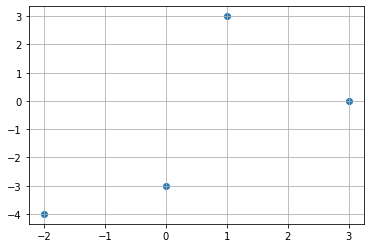

In [3]:
plt.scatter(x, y)
plt.grid()

In [12]:
A = np.array([[-2, 1],
              [ 0, 1],
              [ 1, 1],
              [ 3, 1]])

In [14]:
A.shape

(4, 2)

In [15]:
b = np.array([-4, -3, 3, 0])
b = b.reshape(-1, 1)

In [18]:
b

array([[-4],
       [-3],
       [ 3],
       [ 0]])

In [19]:
x_hat = np.dot(np.dot(np.linalg.inv(np.dot(A.T, A)), A.T), b)

In [20]:
x_hat

array([[ 1. ],
       [-1.5]])

In [21]:
x_points = np.array([-5, 5])

In [22]:
y_pred = x_points - 1.5

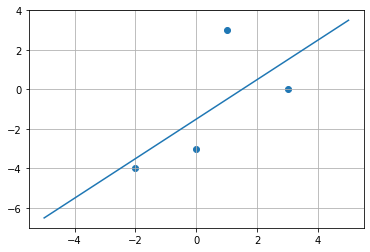

In [23]:
plt.plot(x_points, y_pred)
plt.scatter(x, y)
plt.grid()

In [24]:
Q, R = matrix_factorization_qr(A)

In [25]:
x_hat = np.dot(np.dot(np.linalg.inv(R), Q.T), b)

In [26]:
x_hat

array([[ 1. ],
       [-1.5]])